In [3]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [4]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [6]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

In [7]:
titanic["class"] = titanic.pclass.map({1: "First", 2: "Second", 3: "Third"})
titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis=1)
titanic["adult_male"] = titanic.who == "man"
titanic["deck"] = titanic.cabin.str[0].map(lambda s: np.nan if s == "T" else s)
titanic["embark_town"] = titanic.embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
titanic["alive"] = titanic.survived.map({0: "no", 1: "yes"})
titanic["alone"] = ~(titanic.parch + titanic.sibsp).astype(bool)
titanic = titanic.drop(["name", "ticket", "cabin"], axis=1)

In [8]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Set up a palette for some plots

In [9]:
pal = dict(man="#4682B4", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")

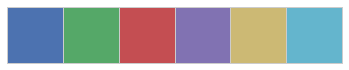

In [10]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [ ]:
sns.set_palette("husl")

## Who were the Titanic passengers?
### How  many men, women, and children are in our sample?

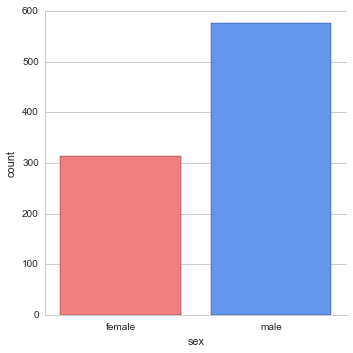

In [12]:
sns.factorplot("sex", data=titanic, palette=pal);

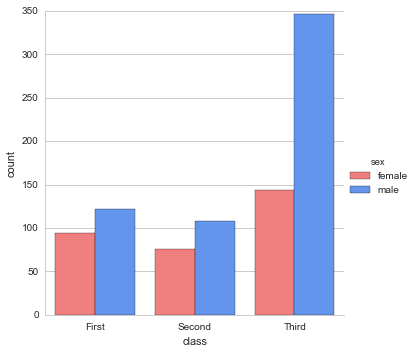

In [13]:
sns.factorplot("class", data=titanic, hue="sex", palette=pal)

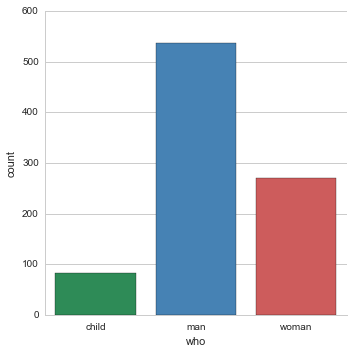

In [14]:
sns.factorplot("who", data=titanic, palette=pal)

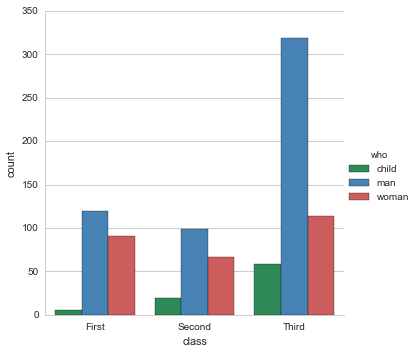

In [15]:
sns.factorplot("class", data=titanic, hue="who", palette=pal)

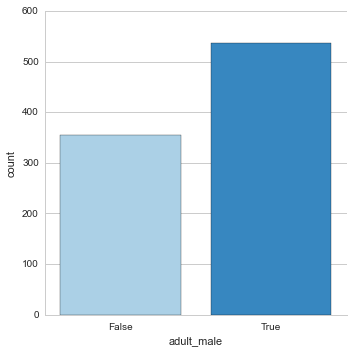

In [16]:
sns.factorplot("adult_male", data=titanic, palette="Blues")

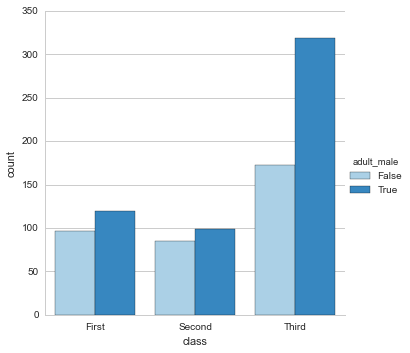

In [17]:
sns.factorplot("class", data=titanic, hue="adult_male", palette="Blues")

/Users/b3j90/anaconda/envs/nlp/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


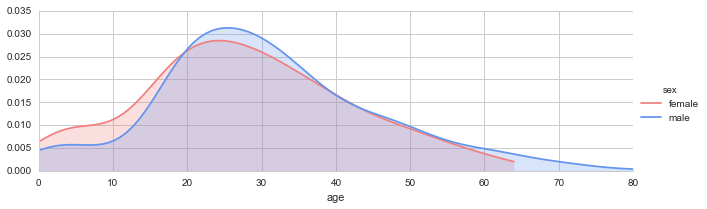

In [19]:
fg = sns.FacetGrid(titanic, hue="sex", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", shade = True)
fg.set(xlim=(0,80))

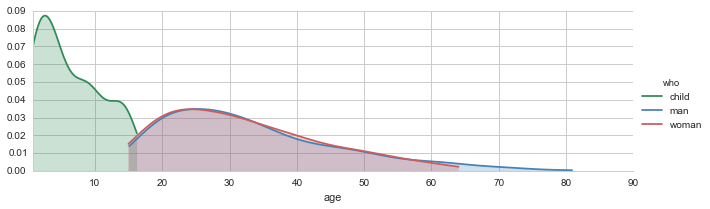

In [21]:
fg = sns.FacetGrid(titanic, hue="who", aspect=3, palette=pal)
fg.map(sns.kdeplot,"age", shade=True)
fg.set(xlim=(0.80))

### How many first, second, and thid class passengers are in our sample?

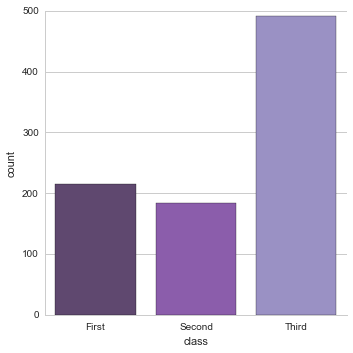

In [22]:
sns.factorplot("class", data=titanic, palette="BuPu_d")

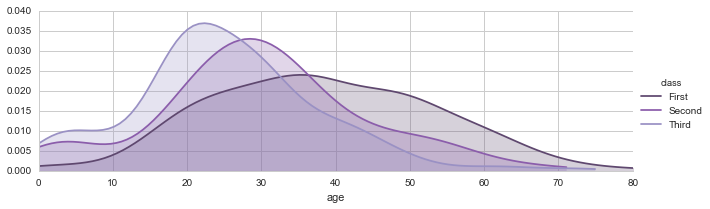

In [24]:
fg = sns.FacetGrid(titanic, hue="class", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0,80))

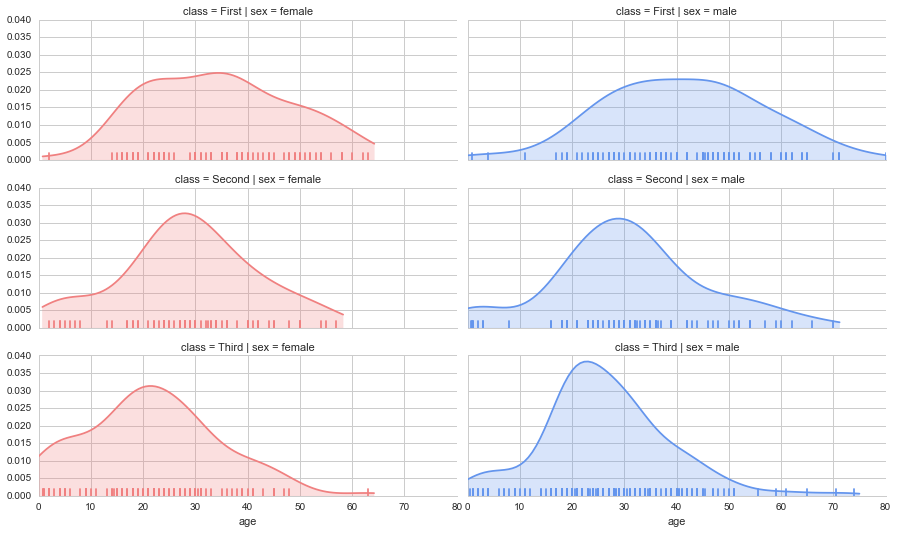

In [25]:
fg = sns.FacetGrid(titanic, col="sex", row="class", hue="sex", size=2.5, aspect=2.5, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.map(sns.rugplot, "age")
sns.despine(left=True)
fg.set(xlim=(0, 80));

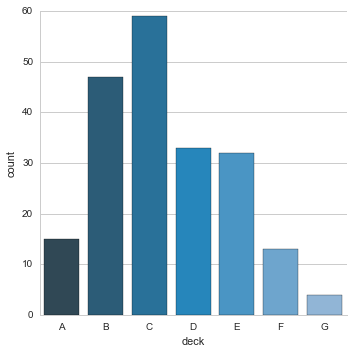

In [26]:
sns.factorplot("deck", data=titanic, palette="PuBu_d")

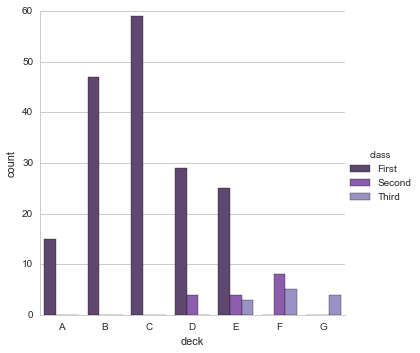

In [27]:
sns.factorplot("deck", hue="class", data=titanic, palette="BuPu_d")

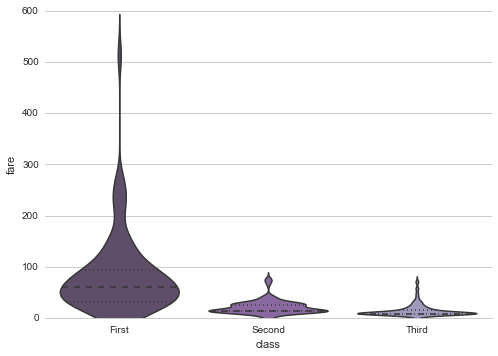

In [28]:
sns.violinplot(titanic["fare"], titanic["class"], color="BuPu_d").set_ylim(0, 600)
sns.despine(left=True);

There are some extreme outliers in the first class distribution

In [30]:
titanic["fare_winsor"] = titanic.fare.map(lambda f: min(f,200))

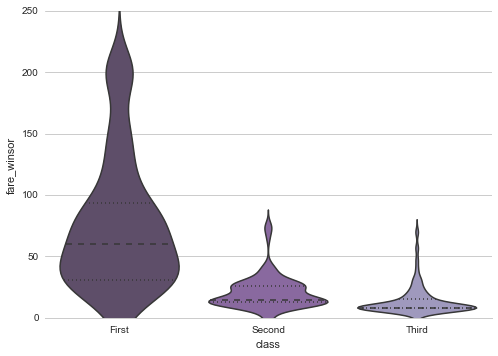

In [31]:
sns.violinplot(titanic["fare_winsor"], titanic["class"], color="BuPu_d").set_ylim(0,250)
sns.despine(left=True)

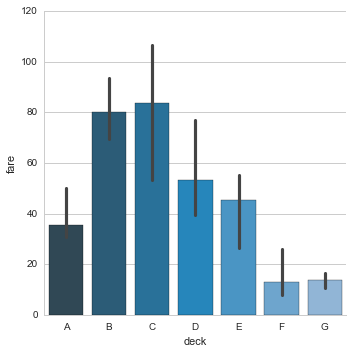

In [32]:
sns.factorplot("deck", "fare", data=titanic, palette="PuBu_d", estimator=np.median)

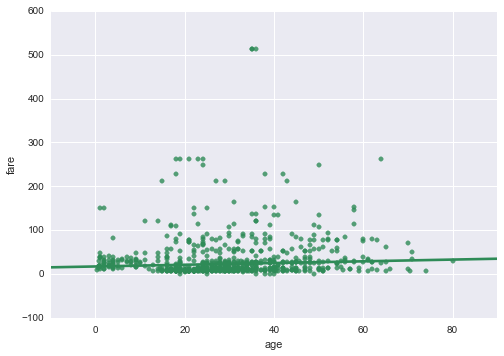

In [39]:
from seaborn import linearmodels
reload(linearmodels)
reload(sns)
sns.regplot("age", "fare", data=titanic, robust=True, ci=None, color="seagreen")

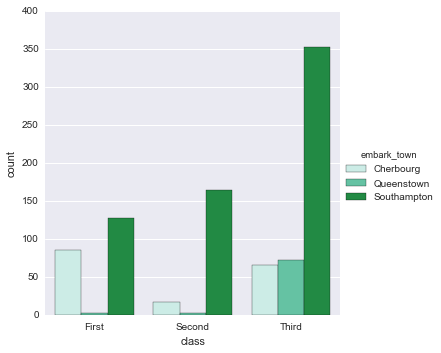

In [40]:
sns.factorplot("class", data=titanic, hue="embark_town", palette="BuGn")

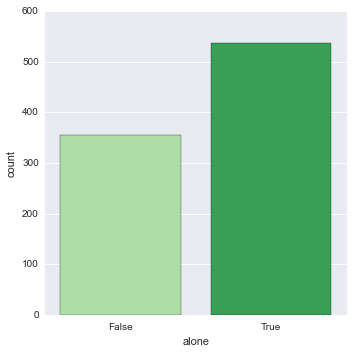

In [41]:
sns.factorplot("alone", data=titanic, palette="Greens")

### What made people survive the sinking?

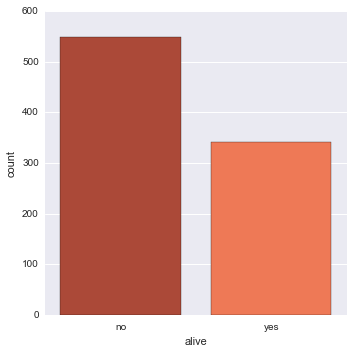

In [42]:
sns.factorplot("alive", data=titanic, palette="OrRd_d")

### What classes of the survivors traveled in?

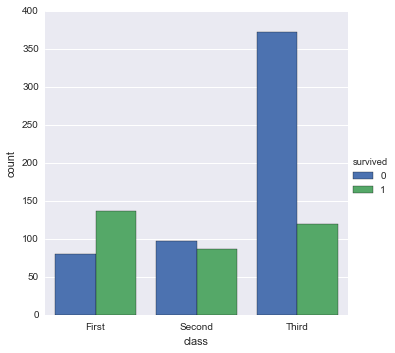

In [44]:
sns.factorplot("class", hue = "survived", data=titanic)

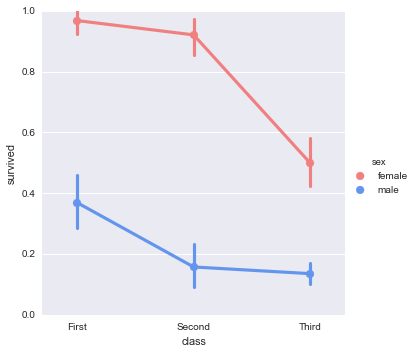

In [46]:
sns.factorplot("class", "survived", data= titanic, hue="sex", palette = pal).set(ylim=(0,1))

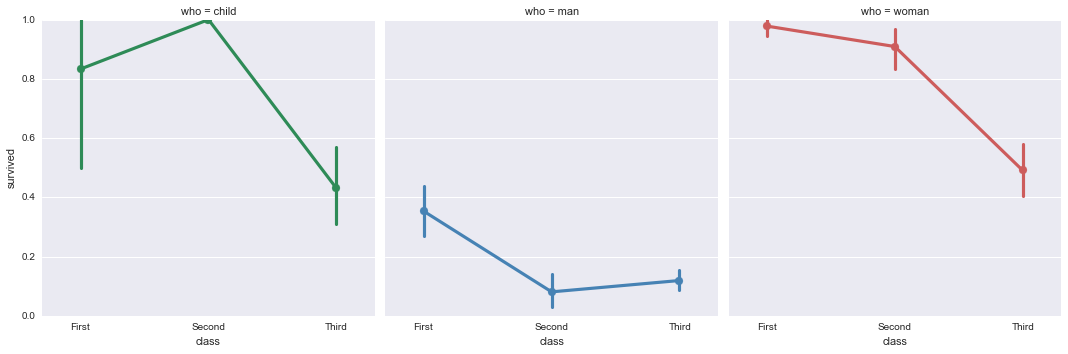

In [54]:
fg = sns.factorplot("class", "survived", data=titanic, hue="who", col="who", palette = pal)
fg.set(ylim=(0,1))
fg.despine(left = True)

### Did age matter in general?

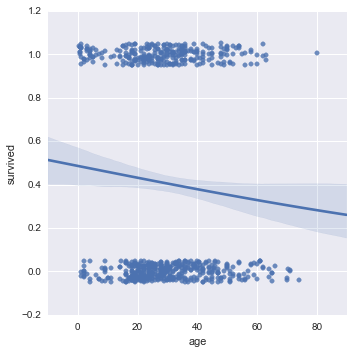

In [55]:
sns.lmplot("age", "survived", titanic, logistic = True, y_jitter=.05)

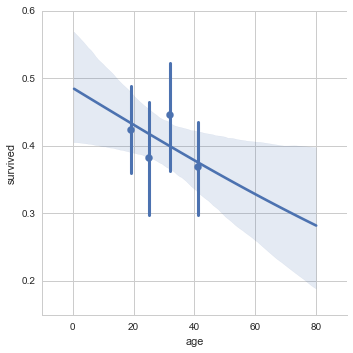

In [57]:
sns.set(style="whitegrid")
sns.lmplot("age", "survived", titanic, logistic=True, x_bins=4, truncate=True);

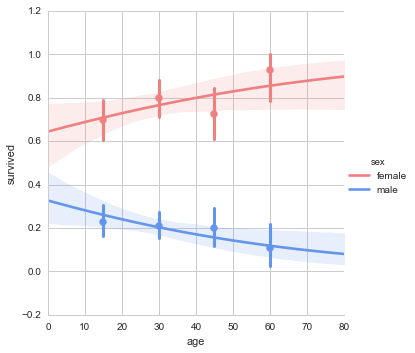

In [58]:
age_bins = [15, 30, 45, 60]
sns.lmplot("age", "survived", titanic, hue="sex",
           palette=pal, x_bins=age_bins, logistic=True).set(xlim=(0, 80));

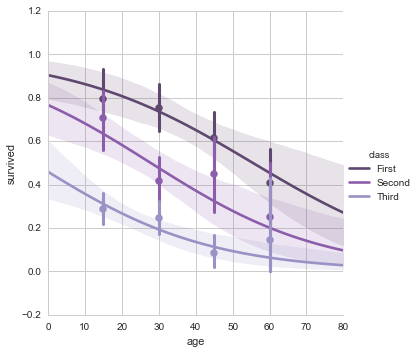

In [59]:
sns.lmplot("age", "survived", titanic, hue="class",
           palette="BuPu_d", x_bins=age_bins, logistic=True).set(xlim=(0, 80));

### Did it matter what passengers paid, or where they stayed?

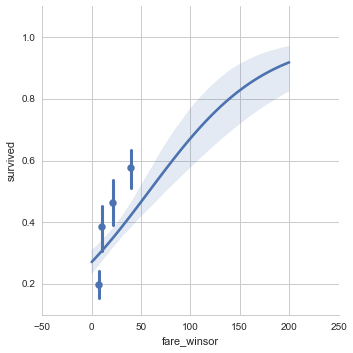

In [62]:
sns.lmplot("fare_winsor", "survived", titanic, x_bins = 4, logistic=True, truncate=True)

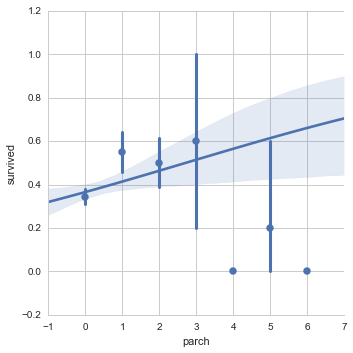

In [63]:
sns.lmplot("parch", "survived", titanic, x_estimator=np.mean, logistic=True);

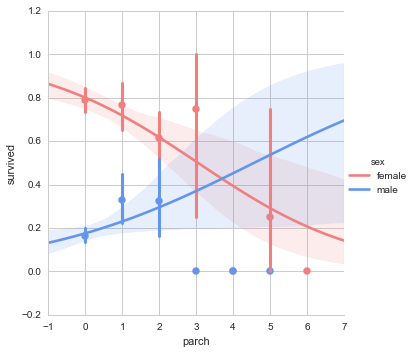

In [64]:
sns.lmplot("parch", "survived", titanic, hue="sex", x_estimator=np.mean, logistic=True, palette=pal);